# Математичні моделі в продуктовому маркетингу

## Churn Prediction - EDA + Logistic Regression

###  Практична робота 3

1. Використовуючи підготовлені дані telecom dataset, оцініть модель Random Forest, виконайте hyperparameters tuning (see https://medium.com/swlh/random-forest-from-model-building-to-hyperparameter-tuning-in-python-5d0c07a428eb) . 

2. Визначте оптимальний threshold рівень. Визначте і візуалізуйте точність (ROC/AUC, Accuracy, Precision, Recall, F1 Score). Зробіть висновки.

3. Оцініть feature importance різними способами, вкл. Gini  Importance, Mean Decrease Accuracy, SHAP (see https://mljar.com/blog/feature-importance-in-random-forest/, https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html).

4. Збалансуйте класи вибірки за допомогою одного з методів oversampling / undersampling. Перевірте точність моделі і порівняйте її з попередньою моделлю (see https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/).

6. Визначте оптимальний threshold рівень для моделі зі збалансованими класами, спробуйте покращити точність моделі (see https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/). 

Інтерпретуйте отримані результати. Зробіть висновки.

**_Студентка Пороскун Олена. Група ПМ.м-21_**

In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.inspection import permutation_importance
import shap

**Використовуючи підготовлені дані telecom dataset, оцініть модель Random Forest, виконайте hyperparameters tuning.**

In [6]:
df = pd.read_csv('Churn.csv')
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [7]:
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [9]:
from sklearn.preprocessing import StandardScaler 

df.loc[df.Churn == 'no', 'Churn'] = 0
df.loc[df.Churn == 'yes', 'Churn'] = 1

df.loc[df.Intl_Plan == 'no', 'Intl_Plan'] = 0
df.loc[df.Intl_Plan == 'yes', 'Intl_Plan'] = 1

df.loc[df.Vmail_Plan == 'no', 'Vmail_Plan'] = 0
df.loc[df.Vmail_Plan == 'yes', 'Vmail_Plan'] = 1 

df = df.drop(columns = ['Phone', 'Area_Code', 'State']) 
#StandardScaler().fit_transform(df) 

In [10]:
X = df.drop(columns=['Churn', ]).values
y = df['Churn'].values

y = y.astype('int')
#y.dtypes

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [12]:
bag_forest_reg = RandomForestRegressor(n_estimators=100,
                                       criterion="mse",
                                       n_jobs=-1,
                                       random_state=1)

bag_forest_reg.fit(X_train, y_train)

train_pred_y = bag_forest_reg.predict(X_train)
test_pred_y = bag_forest_reg.predict(X_test)

In [13]:
rf_reg = RandomForestRegressor(n_estimators=100,
                               criterion="mse",
                               max_features=6,
                               n_jobs=-1,
                               random_state=1)

rf_reg.fit(X_train, y_train)

train_pred_y = rf_reg.predict(X_train)
test_pred_y = rf_reg.predict(X_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y)}")

train_MAE = 0.03738184546136534
test_MAE = 0.10446776611694154


Після перевірки випадкового лісу настав час **налаштувати гіперпараметри (hyperparameters tuning )** для максимальної продуктивності. Ми будемо використовувати GridSearchCV з sklearn для налаштування наших гіперпараметрів, який дуже простий у розумінні, він пробує всі комбінації гіперпараметрів, задані в param_grid, і обчислює продуктивність моделі для кожної комбінації, використовуючи K-кратну перехресну перевірку (K-fold cross validation). У нашому випадку буде проведено (3х3х6) х cv = 162 навчання.

In [14]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


RandomForestRegressor(max_depth=10, max_features=10, n_estimators=300)

In [15]:
rf_reg = rf_reg_tuned.best_estimator_

rf_reg.fit(X_train, y_train)

train_pred_y = rf_reg.predict(X_train)
test_pred_y = rf_reg.predict(X_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y)}")

train_MAE = 0.05106626572085568
test_MAE = 0.09107735760606148


In [16]:
rf_reg_best = rf_reg_tuned.best_estimator_

col_names = df.drop(columns=["Churn"]).columns
fi_df = pd.DataFrame(rf_reg_best.feature_importances_, index=col_names, columns=["Importance"])

fi_df.sort_values("Importance", ascending=False)

,Importance
Day_Charge,0.147171
Day_Mins,0.139943
CustServ_Calls,0.131064
Intl_Plan,0.088948
Intl_Calls,0.076229
Eve_Mins,0.073732
Eve_Charge,0.072558
Intl_Mins,0.044078
Intl_Charge,0.041054
Vmail_Message,0.035425


**Визначте оптимальний threshold рівень. Визначте і візуалізуйте точність (ROC/AUC, Accuracy, Precision, Recall, F1 Score). Зробіть висновки.**

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict_proba(X_train)
y_test_pred = rf_model.predict_proba(X_test)
print(f"Random Forest train roc_auc : {roc_auc_score(y_train, y_train_pred[:,1])}")
print(f"Random Forest test roc_auc : {roc_auc_score(y_test, y_test_pred[:,1])}")

Random Forest train roc_auc : 1.0
Random Forest test roc_auc : 0.9375852779624252


In [18]:
pred = []
for model in [rf_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis = 1).mean(axis = 1)

In [19]:
fpr,tpr,thresholds = roc_curve(y_test, final_prediction)

In [20]:
thresholds

array([1.98, 0.98, 0.96, 0.95, 0.94, 0.93, 0.91, 0.89, 0.88, 0.87, 0.86,
       0.83, 0.81, 0.78, 0.77, 0.76, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.62, 0.61, 0.56, 0.55, 0.51, 0.49, 0.47, 0.46, 0.45,
       0.43, 0.42, 0.41, 0.39, 0.36, 0.35, 0.33, 0.29, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.19, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01,
       0.  ])

In [21]:
def opt_threshold_acc(y_true, y_pred):
    A = list(zip(y_true, y_pred))
    A = sorted(A, key=lambda x: x[1])
    total = len(A)
    tp = len([1 for x in A if x[0]==1])
    tn = 0
    th_acc = []
    for x in A:
        th = x[1]
        if x[0] == 1:
            tp -= 1
        else:
            tn += 1
        acc = (tp + tn) / total
        th_acc.append((th, acc))
    return max(th_acc, key=lambda x: x[1])

threshold_opt= opt_threshold_acc(y_test, final_prediction)

print("Оптимальний threshold рівень:\t", threshold_opt[0])

Оптимальний threshold рівень:	 0.39


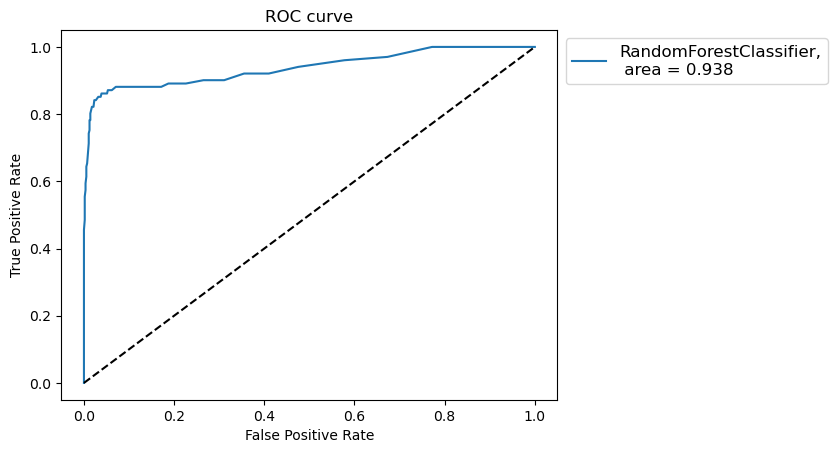

In [22]:
#fpr, tpr, thresholds = roc_curve(y_test, final_prediction) 
auc = roc_auc_score(y_test, final_prediction)
plt.plot(fpr, tpr, label='RandomForestClassifier,\n area = {:.3}'.format(auc))  

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.plot([0, 1], [0, 1], "k--")  
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
plt.show() 

In [23]:
# Створення класифікатора
clf = RandomForestClassifier(n_estimators=100,
                               max_features=12,
                               max_depth=10,
                               n_jobs=-1,
                               random_state=1)

# Підгонка до навчальних даних
clf.fit(X_train, y_train)

# Прогнозування міток тестового набору
y_pred_RFC = clf.predict(X_test)
#print(y_pred_RFC)

accuracy  = metrics.accuracy_score(y_test, y_pred_RFC)
precision = metrics.precision_score(y_test, y_pred_RFC)
recall    = metrics.recall_score(y_test, y_pred_RFC)
f1_score  = metrics.f1_score(y_test, y_pred_RFC)

print("Accuracy:\t",  accuracy) 
print("Precision:\t", precision) 
print("Recall: \t",   recall)
print('F1_score:\t', f1_score)

Accuracy:	 0.9490254872563718
Precision:	 0.9240506329113924
Recall: 	 0.7227722772277227
F1_score:	 0.8111111111111111


Судячи з метрик, представлена модель має високу точність. Тому її можна застосовувати до аналізу даних.

**Оцініть feature importance різними способами, вкл. Gini  Importance, Mean Decrease Accuracy, SHAP**

In [24]:
X = df.drop(columns=['Churn']).values
y = df['Churn'].values

y = y.astype('int')
#y.dtypes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [25]:
rf = RandomForestClassifier(n_estimators=100,
                               max_features=12,
                               max_depth=10,
                               n_jobs=-1,
                               random_state=1)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=12, n_jobs=-1, random_state=1)

In [27]:
rf.feature_importances_

array([0.0160891 , 0.03429886, 0.1440506 , 0.07568413, 0.02491817,
       0.04184509, 0.12675026, 0.08754306, 0.03119343, 0.01646972,
       0.14428838, 0.0155792 , 0.07264329, 0.01604114, 0.02500862,
       0.07764782, 0.04994912])

<BarContainer object of 17 artists>

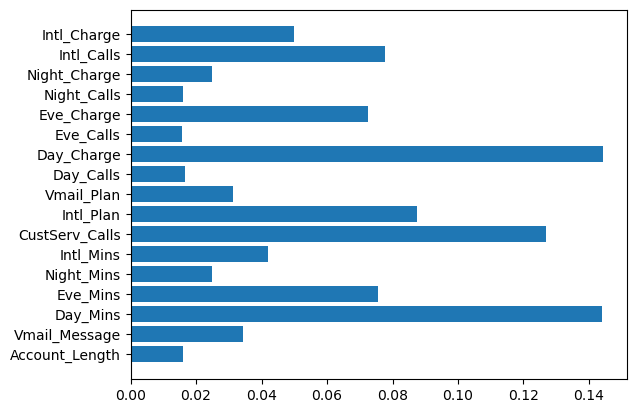

In [28]:
col = df.drop(columns=['Churn', ]).columns
plt.barh(col, rf.feature_importances_)

Permutation Based Feature Importance (with scikit-learn)

In [29]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

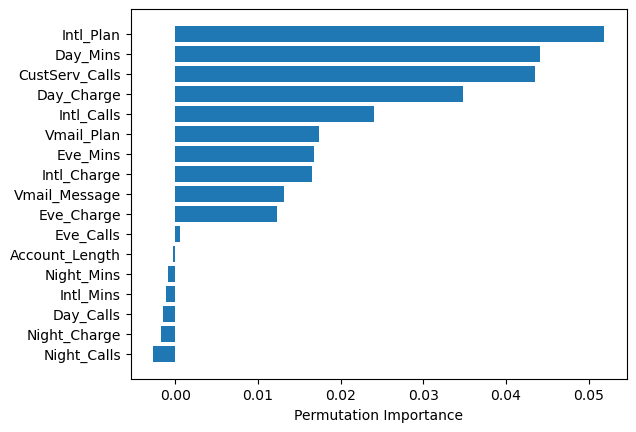

In [30]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(col[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Feature Importance Computed with SHAP Values

In [31]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

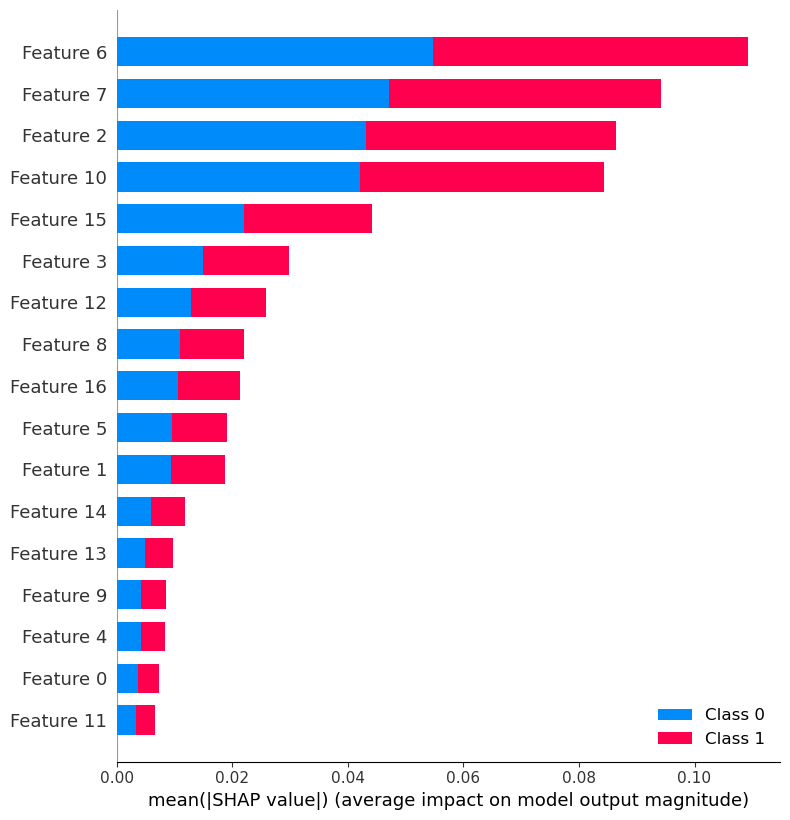

In [32]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

**Збалансуйте класи вибірки за допомогою одного з методів oversampling / undersampling. Перевірте точність моделі і порівняйте її з попередньою моделлю**

Resampling (Oversampling and Undersampling)

In [33]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

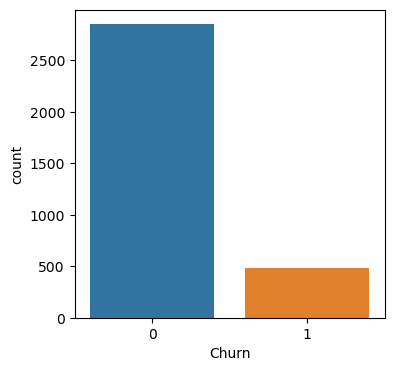

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(df['Churn'])

In [35]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']==0)] 
df_minority = df[(df['Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2850, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [36]:
df_upsampled['Churn'].value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

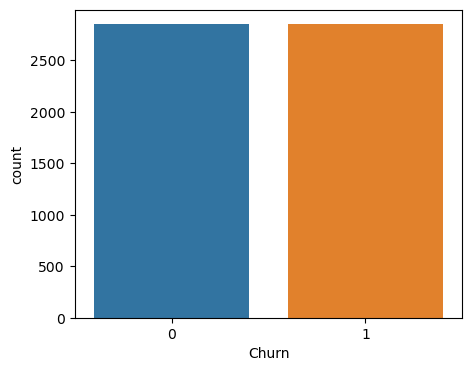

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(df_upsampled['Churn'])

In [38]:
def funct_metrics(df):
    X = df.drop(columns=['Churn']).values
    y = df['Churn'].values
    y = y.astype('int')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    # Створення класифікатора
    clf = RandomForestClassifier(n_estimators=100,
                                   max_features=12,
                                   max_depth=10,
                                   n_jobs=-1,
                                   random_state=1)

    # Підгонка до навчальних даних
    clf.fit(X_train, y_train)

    # Прогнозування міток тестового набору
    y_pred_RFC = clf.predict(X_test)
    #print(y_pred_RFC)

    accuracy  = metrics.accuracy_score(y_test, y_pred_RFC)
    precision = metrics.precision_score(y_test, y_pred_RFC)
    recall    = metrics.recall_score(y_test, y_pred_RFC)
    f1_score  = metrics.f1_score(y_test, y_pred_RFC)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_RFC) 
    auc = roc_auc_score(y_test, y_pred_RFC) 
    
    print("Accuracy:\t",  accuracy) 
    print("Precision:\t", precision) 
    print("Recall: \t",   recall)
    print('F1_score:\t', f1_score)
    print('AUC-ROC(area):\t', auc)  
    
    '''
    plt.plot(fpr, tpr, label='RandomForestClassifier,\n area = {:.3}'.format(auc)) 
    plt.xlabel("False Positive Rate") 
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.plot([0, 1], [0, 1], "k--")  
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
    plt.show()
    ''' 
    
    return accuracy, precision, recall, f1_score, auc

In [39]:
metrics1 = funct_metrics(df)

Accuracy:	 0.9490254872563718
Precision:	 0.9240506329113924
Recall: 	 0.7227722772277227
F1_score:	 0.8111111111111111
AUC-ROC(area):	 0.8560857852569709


In [40]:
metrics2 = funct_metrics(df_upsampled)

Accuracy:	 0.9517543859649122
Precision:	 0.975177304964539
Recall: 	 0.9306260575296108
F1_score:	 0.9523809523809523
AUC-ROC(area):	 0.9525625733913992


**Визначте оптимальний threshold рівень для моделі зі збалансованими класами, спробуйте покращити точність моделі.**

In [41]:
def funct_ytest_ypred(df_upsampled):
    X = df_upsampled.drop(columns=['Churn']).values
    y = df_upsampled['Churn'].values

    y = y.astype('int')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    rf_model = RandomForestClassifier()
    rf_model.fit(X_train,y_train)   
    y_pred = rf_model.predict_proba(X_test) #probability of the class labe
    print('y_pred:\n', y_pred)
    return y_test, y_pred

y_test_upsampled, y_pred_upsampled = funct_ytest_ypred(df_upsampled)

y_pred:
 [[0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 ...
 [0.02 0.98]
 [0.   1.  ]
 [0.55 0.45]]


In [42]:
def opt_threshold_acc(y_true, y_pred):
    A = list(zip(y_true, y_pred))
    A = sorted(A, key=lambda x: x[1])
    total = len(A)
    tp = len([1 for x in A if x[0]==1])
    tn = 0
    th_acc = []
    for x in A:
        th = x[1]
        if x[0] == 1:
            tp -= 1
        else:
            tn += 1
        acc = (tp + tn) / total
        th_acc.append((th, acc))
    return max(th_acc, key=lambda x: x[1])

threshold_opt, accuracy_opt = opt_threshold_acc(y_test_upsampled, y_pred_upsampled[:,1])

print("Оптимальний threshold рівень:\t", threshold_opt)
print("Оптимальне значення точності:\t", accuracy_opt)

Оптимальний threshold рівень:	 0.62
Оптимальне значення точності:	 0.993859649122807


Отже, ми розглянули метод класифікації Random Forest, він дає досить точні результати судячи з метрик якості. Зі збалансованими класами модель дає точніші результати. Тому при аналізі даних telecom dataset варто обирати саме цей метод класифікації і використовувати модель зі збалансовуваними класами.

_____________________________________________________________________________________________________________________